## Solar energy predictor


#### Life cycle of Machine learning Project

- Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Optimize the power output efficiency of the solar array by developing a predictive model that accurately forecasts the inverter's AC power output (InvPAC_kW_Avg) based on environmental conditions and system parameters. This model will enable proactive adjustments to maximize energy harvesting and improve overall system performance in varying weather conditions


### 2) Data Collection
- Dataset Source - Bulk downloaded from https://pvdata.nist.gov/
- The data consists of [TODO] column and [TODO] rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [31]:
df = pd.read_csv('data/onemin-Ground-2017-01-01.csv')

#### Show Top 10 Records

In [32]:
df.head(10)

,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,RECORD,CR1000Temp_C_Avg,DoorOpen_Min,RefCell1_Wm2_Avg,AmbTemp_C_Avg,InvVDVoltage_V_Avg,InvVa_Avg,...,RTD_C_Avg_1,RTD_C_Avg_2,RTD_C_Avg_3,RTD_C_Avg_4,RTD_C_Avg_5,RTD_C_Avg_6,RTD_C_Avg_7,RTD_C_Avg_8,RTD_C_Avg_9,RTD_C_Avg_10
0,2017-01-01 00:00:00-05:00,-7.959892,-2.633791,216305,7.202,0.0,0.312,6.851,8.290,276.5,...,6.044,5.853,5.755,5.755,5.788,6.681,5.965,5.658,5.729,7.410
1,2017-01-01 00:01:00-05:00,-7.959892,-2.633791,216306,7.202,0.0,0.306,6.804,8.230,276.5,...,6.059,5.853,5.755,5.723,5.755,6.653,5.951,5.625,5.747,7.425
2,2017-01-01 00:02:00-05:00,-7.959892,-2.633791,216307,7.202,0.0,0.306,6.751,9.090,276.5,...,6.044,5.853,5.755,5.705,5.755,6.668,5.951,5.560,5.762,7.410
3,2017-01-01 00:03:00-05:00,-7.959892,-2.633791,216308,7.200,0.0,0.306,6.792,9.950,276.7,...,6.011,5.835,5.723,5.676,5.755,6.634,5.951,5.560,5.762,7.428
4,2017-01-01 00:04:00-05:00,-7.959892,-2.633791,216309,7.200,0.0,0.306,6.768,10.560,276.9,...,5.997,5.788,5.690,5.687,5.755,6.653,5.918,5.560,5.762,7.447
5,2017-01-01 00:05:00-05:00,-7.959892,-2.633791,216310,7.189,0.0,0.306,6.745,10.540,276.8,...,5.946,5.755,5.708,5.690,5.755,6.649,5.951,5.560,5.744,7.410
6,2017-01-01 00:06:00-05:00,-7.959892,-2.633791,216311,7.180,0.0,0.306,6.759,9.460,276.6,...,5.946,5.755,5.658,5.658,5.705,6.634,5.918,5.560,5.762,7.428
7,2017-01-01 00:07:00-05:00,-7.959892,-2.633791,216312,7.180,0.0,0.306,6.728,7.913,276.7,...,5.964,5.755,5.658,5.658,5.708,6.634,5.951,5.560,5.747,7.410
8,2017-01-01 00:08:00-05:00,-7.959892,-2.633791,216313,7.180,0.0,0.306,6.786,6.310,276.4,...,5.979,5.755,5.658,5.658,5.723,6.634,5.918,5.560,5.697,7.410
9,2017-01-01 00:09:00-05:00,-7.959892,-2.745868,216314,7.176,0.0,0.306,6.762,5.246,276.7,...,5.936,5.755,5.658,5.658,5.705,6.634,5.853,5.524,5.667,7.444


### 2.2 Dataset information

| Column Name | Description |
|-------------|-------------|
| TIMESTAMP | Date and time of the measurement in ISO 8601 format |
| Pyra1_Wm2_Avg | Average reading from Pyranometer 1 in watts per square meter |
| Pyra2_Wm2_Avg | Average reading from Pyranometer 2 in watts per square meter |
| RECORD | Numerical record identifier |
| CR1000Temp_C_Avg | Average temperature of the CR1000 data logger in Celsius |
| DoorOpen_Min | Time in minutes that a door (likely to an equipment enclosure) was open |
| RefCell1_Wm2_Avg | Average reading from Reference Cell 1 in watts per square meter |
| AmbTemp_C_Avg | Average ambient temperature in Celsius |
| InvVDVoltage_V_Avg | Average DC bus voltage of the inverter in volts |
| InvVa_Avg, InvVb_Avg, InvVc_Avg | Average voltage for phases A, B, and C of the inverter output |
| InvIa_Avg, InvIb_Avg, InvIc_Avg | Average current for phases A, B, and C of the inverter output |
| InvVDCin_Avg | Average DC input voltage to the inverter |
| InvIDCin_Avg | Average DC input current to the inverter |
| InvFreq_Avg | Average frequency of the inverter output |
| InvPAC_kW_Avg | Average AC power output of the inverter in kilowatts |
| InvEtot_kWh_Max | Maximum total energy output of the inverter in kilowatt-hours |
| InvVPVin_Avg | Average PV input voltage to the inverter |
| InvPDC_kW_Avg | Average DC power input to the inverter in kilowatts |
| InvOpStatus_Avg | Average operational status of the inverter |
| InvMainFault_Max, InvDriveFault_Max, InvVoltageFault_Max, InvGridFault_Max, InvTempFault_Max, InvSystemFault_Max | Maximum fault indicators for various inverter systems |
| InvSystemWarn_Max | Maximum system warning indicator for the inverter |
| InvPVMStatus_Max | Maximum PV module status indicator |
| SEWSAmbientTemp_C_Avg | Average ambient temperature from SEWS sensor in Celsius |
| SEWSModuleTemp_C_Avg | Average module temperature from SEWS sensor in Celsius |
| SEWSPOAIrrad_Wm2_Avg | Average plane of array irradiance from SEWS sensor in watts per square meter |
| PwrMtrIa_Avg, PwrMtrIb_Avg, PwrMtrIc_Avg | Average current for phases A, B, and C from the power meter |
| PwrMtrFreq_Avg | Average frequency reading from the power meter |
| PwrMtrFreqMin_Min, PwrMtrFreqMax_Max | Minimum and maximum frequency readings from the power meter |
| PwrMtrPhaseRev_Avg | Average phase reversal indicator from the power meter |
| PwrMtrVa_Avg, PwrMtrVb_Avg, PwrMtrVc_Avg | Average voltage for phases A, B, and C from the power meter |
| PwrMtrP_kW_Avg | Average power reading from the power meter in kilowatts |
| PwrMtrP_kVAR_Avg | Average reactive power reading from the power meter in kilovolt-amperes reactive |
| PwrMtrP_kVA_Avg | Average apparent power reading from the power meter in kilovolt-amperes |
| PwrMtrEdel_kWh_Max | Maximum delivered energy reading from the power meter in kilowatt-hours |
| PwrMtrErec_kWh_Max | Maximum received energy reading from the power meter in kilowatt-hours |
| PwrMtrEdel_kVARh_Max | Maximum delivered reactive energy reading from the power meter in kilovolt-ampere reactive hours |
| PwrMtrErec_kVARh_Max | Maximum received reactive energy reading from the power meter in kilovolt-ampere reactive hours |
| PwrMtrPF_Avg | Average power factor reading from the power meter |
| PwrMtrVaTHDMax_Max, PwrMtrVbTHDMax_Max, PwrMtrVcTHDMax_Max | Maximum Total Harmonic Distortion for voltages of phases A, B, and C |
| ShuntCurrent_A_Avg_1 to ShuntCurrent_A_Avg_7 | Average current readings from 7 different shunts in amperes |
| ShuntPDC_kW_Avg_1 to ShuntPDC_kW_Avg_7 | Average DC power readings from 7 different shunts in kilowatts |
| ShuntEtot_kWh_Max_1 to ShuntEtot_kWh_Max_7 | Maximum total energy readings from 7 different shunts in kilowatt-hours |
| WindSpeedAve_ms | Average wind speed in meters per second |
| WindDirAve_deg | Average wind direction in degrees |
| WindDirStdDev_deg | Standard deviation of wind direction in degrees |
| WindSpeed_ms_Max | Maximum wind speed in meters per second |
| WindRef_V_Min | Minimum reference voltage for the wind sensor |
| WindHeatStateID_Avg | Average heating state ID for the wind sensor |
| WindValid_Avg | Average validity indicator for wind measurements |
| Battery_V_Min | Minimum battery voltage |
| Battery_A_Avg | Average battery current |
| Load_A_Avg | Average load current |
| ChgState_Min | Minimum charge state |
| ChgSource_Min | Minimum charge source |
| CkBatt_Max | Maximum battery check value |
| Qloss_Ah_Max | Maximum charge loss in ampere-hours |
| RTD_C_Avg_1 to RTD_C_Avg_10 | Average temperature readings from 10 different RTD (Resistance Temperature Detector) sensors in Celsius |

## Input Feature Columns (Single Day, Minute-level Data):

1. `TIMESTAMP` (Hour and minute of the day)
2. `AmbTemp_C_Avg` (Ambient Temperature)
3. `WindSpeedAve_ms` (Wind Speed)
4. `WindDirAve_deg` (Wind Direction)
5. `RTD_C_Avg_1` to `RTD_C_Avg_10` (Temperature readings from various sensors)

## Target Column:
`PwrMtrP_kW_Avg` （Average Power Meter Reading in kilowatts）

## Rationale:

1. **Target Selection**: `PwrMtrP_kW_Avg` represents the average power reading from the power meter in kilowatts. This is a direct measure of the system's power output, making it an excellent target for prediction. It captures the overall performance of the solar power system.

2. **Time-Based Patterns**: The `TIMESTAMP` feature allows the model to learn daily patterns in solar energy production. It can capture the sun's position throughout the day, which significantly affects power generation.

3. **Ambient Conditions**: `AmbTemp_C_Avg` (ambient temperature) is crucial as it directly affects solar panel efficiency. Higher temperatures generally reduce panel efficiency.

4. **Wind Factors**: Both `WindSpeedAve_ms` and `WindDirAve_deg` are important as they influence panel temperature and efficiency. Wind can cool panels, potentially increasing efficiency, and also affect dust accumulation or removal.

5. **Detailed Temperature Profile**: The inclusion of multiple RTD sensor readings (`RTD_C_Avg_1` to `RTD_C_Avg_10`) provides a comprehensive temperature profile of the system. This can capture temperature variations across different parts of the installation, which may influence overall performance.

6. **Avoiding Data Leakage**: All selected features are environmental or time-based measurements that can be obtained independently of the solar power system's performance. This ensures no data leakage in our predictive model, making it robust and applicable to real-world scenarios.

7. **Predictive Power**: This combination of features should provide strong predictive power for the system's power output. It captures the key environmental factors that influence solar power generation without relying on direct solar irradiance measurements.

8. **Scalability and Generalizability**: These features are commonly available or can be easily measured, making the model potentially applicable to other solar installations or locations with similar data collection capabilities.

9. **Interpretability**: The selected features allow for an interpretable model. It will be possible to understand how each environmental factor contributes to power output, providing valuable insights for system optimization.

10. **Challenges**: By not including direct solar irradiance measurements (like pyranometer data), the model faces a more challenging and realistic prediction task. It must infer the available solar energy from other environmental factors, which can lead to a more robust and generalizable model.



#### Shape of the dataset

In [33]:
df.shape

(1440, 100)

In [47]:
# Assuming your dataframe is called 'df'

# List of features we want to keep
features = [
    'TIMESTAMP',
    'AmbTemp_C_Avg',
    'WindSpeedAve_ms',
    'WindDirAve_deg',
    'RTD_C_Avg_1',
    'RTD_C_Avg_2',
    'RTD_C_Avg_3',
    'RTD_C_Avg_4',
    'RTD_C_Avg_5',
    'RTD_C_Avg_6',
    'RTD_C_Avg_7',
    'RTD_C_Avg_8',
    'RTD_C_Avg_9',
    'RTD_C_Avg_10'
]

# Target variable
target = 'PwrMtrP_kW_Avg'

# Create a new dataframe with only the features and target variable we want
df_selected = df[features + [target]]

# Display the first few rows to verify
print(df_selected.head())

# Check the shape of the new dataframe
print(f"Shape of the selected dataframe: {df_selected.shape}")

                   TIMESTAMP  AmbTemp_C_Avg  WindSpeedAve_ms  WindDirAve_deg  \
0  2017-01-01 00:00:00-05:00          6.851            1.325           212.2   
1  2017-01-01 00:01:00-05:00          6.804            2.260           205.5   
2  2017-01-01 00:02:00-05:00          6.751            2.162           213.2   
3  2017-01-01 00:03:00-05:00          6.792            2.167           207.9   
4  2017-01-01 00:04:00-05:00          6.768            2.368           216.0   

   RTD_C_Avg_1  RTD_C_Avg_2  RTD_C_Avg_3  RTD_C_Avg_4  RTD_C_Avg_5  \
0        6.044        5.853        5.755        5.755        5.788   
1        6.059        5.853        5.755        5.723        5.755   
2        6.044        5.853        5.755        5.705        5.755   
3        6.011        5.835        5.723        5.676        5.755   
4        5.997        5.788        5.690        5.687        5.755   

   RTD_C_Avg_6  RTD_C_Avg_7  RTD_C_Avg_8  RTD_C_Avg_9  RTD_C_Avg_10  \
0        6.681        5.965

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [48]:
df_selected.isnull().sum()

TIMESTAMP           0
AmbTemp_C_Avg       0
WindSpeedAve_ms    63
WindDirAve_deg      0
RTD_C_Avg_1         0
RTD_C_Avg_2         0
RTD_C_Avg_3         0
RTD_C_Avg_4         0
RTD_C_Avg_5         0
RTD_C_Avg_6         0
RTD_C_Avg_7         0
RTD_C_Avg_8         0
RTD_C_Avg_9         0
RTD_C_Avg_10        0
PwrMtrP_kW_Avg      0
dtype: int64

#### There are some missing values in the data set for average wind speed

#### We fill missing values with mean of average wind speed

In [49]:
# Using mean
df_selected['WindSpeedAve_ms'].fillna(df_selected['WindSpeedAve_ms'].mean(), inplace=True)

# Or using median
# df_selected['WindSpeedAve_ms'].fillna(df_selected['WindSpeedAve_ms'].median(), inplace=True)

In [50]:
df_selected.isnull().sum()

TIMESTAMP          0
AmbTemp_C_Avg      0
WindSpeedAve_ms    0
WindDirAve_deg     0
RTD_C_Avg_1        0
RTD_C_Avg_2        0
RTD_C_Avg_3        0
RTD_C_Avg_4        0
RTD_C_Avg_5        0
RTD_C_Avg_6        0
RTD_C_Avg_7        0
RTD_C_Avg_8        0
RTD_C_Avg_9        0
RTD_C_Avg_10       0
PwrMtrP_kW_Avg     0
dtype: int64

### 3.2 Feature engineering for RTD

In [51]:
# List of RTD columns
rtd_columns = ['RTD_C_Avg_1', 'RTD_C_Avg_2', 'RTD_C_Avg_3', 'RTD_C_Avg_4', 'RTD_C_Avg_5', 
               'RTD_C_Avg_6', 'RTD_C_Avg_7', 'RTD_C_Avg_8', 'RTD_C_Avg_9', 'RTD_C_Avg_10']

# Create a new column with the average of all RTD readings
df_selected['RTD_C_Avg_Mean'] = df_selected[rtd_columns].mean(axis=1)

# If you want to drop the original RTD columns:
df_selected = df_selected.drop(columns=rtd_columns)

# Display the first few rows to verify
print(df_selected.head())

# Check the new shape of the dataframe
print(f"New shape of the dataframe: {df_selected.shape}")

                   TIMESTAMP  AmbTemp_C_Avg  WindSpeedAve_ms  WindDirAve_deg  \
0  2017-01-01 00:00:00-05:00          6.851            1.325           212.2   
1  2017-01-01 00:01:00-05:00          6.804            2.260           205.5   
2  2017-01-01 00:02:00-05:00          6.751            2.162           213.2   
3  2017-01-01 00:03:00-05:00          6.792            2.167           207.9   
4  2017-01-01 00:04:00-05:00          6.768            2.368           216.0   

   PwrMtrP_kW_Avg  RTD_C_Avg_Mean  
0             0.0          6.0638  
1             0.0          6.0546  
2             0.0          6.0463  
3             0.0          6.0335  
4             0.0          6.0257  
New shape of the dataframe: (1440, 6)


#### There are no duplicates  values in the data set

### 3.3 Check data types

In [52]:
# Check Null and Dtypes
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TIMESTAMP        1440 non-null   object 
 1   AmbTemp_C_Avg    1440 non-null   float64
 2   WindSpeedAve_ms  1440 non-null   float64
 3   WindDirAve_deg   1440 non-null   float64
 4   PwrMtrP_kW_Avg   1440 non-null   float64
 5   RTD_C_Avg_Mean   1440 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.6+ KB


### 3.4 Checking the number of unique values of each column

In [53]:
df_selected.nunique()

TIMESTAMP          1440
AmbTemp_C_Avg      1119
WindSpeedAve_ms     868
WindDirAve_deg     1155
PwrMtrP_kW_Avg      550
RTD_C_Avg_Mean     1424
dtype: int64

### 3.5 Check statistics of data set

In [54]:
df_selected.describe()

,AmbTemp_C_Avg,WindSpeedAve_ms,WindDirAve_deg,PwrMtrP_kW_Avg,RTD_C_Avg_Mean
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,6.612212,1.060678,192.287051,32.972390,7.976494
std,2.349314,0.823227,110.112867,54.106284,7.448912
min,2.536000,0.077000,0.000000,-0.577000,0.032000
25%,4.738500,0.452750,93.800000,0.000000,2.365825
50%,6.113500,0.841000,204.700000,0.000000,4.899800
75%,8.500000,1.435750,294.900000,57.695000,13.400500
max,11.350000,7.207000,359.800000,206.100000,25.488000


#### Insight

- **Power Meter Power Output (PwrMtrP_kW_Avg)**: 
  - Mean: 32.97 kW
  - Standard Deviation: 54.11 kW
  - Range: 0 kW to 206.1 kW

  The power output shows high variability, with an average of 32.97 kW and a wide range of values. This indicates significant fluctuations in energy production, likely influenced by environmental factors or operational conditions.

- **Wind Speed (WindSpeedAve_ms)**: 
  - Mean: 1.06 m/s
  - Standard Deviation: 0.82 m/s
  - Range: 0.08 m/s to 7.21 m/s

  The wind speed has a high standard deviation, reflecting substantial variability. This can impact the power generation efficiency of wind turbines or the overall energy system, as wind speed is a critical factor in energy production.

- **Wind Direction (WindDirAve_deg)**: 
  - Mean: 192.29°
  - Standard Deviation: 110.11°
  - Range: 0° to 359.8°

  Wind direction varies widely, with a high standard deviation. This indicates that the wind is coming from many different directions, which can affect the alignment and efficiency of wind turbines or other directional equipment.


In summary, the data exhibits moderate to high variability across all metrics, indicating that environmental conditions significantly impact energy production and readings.


In [57]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_selected.columns if df_selected[feature].dtype != 'O']  # Datatype not being object likely being numerical features
categorical_features = [feature for feature in df_selected.columns if df_selected[feature].dtype == 'O']  # Datatype being object likely being categorical features

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['AmbTemp_C_Avg', 'WindSpeedAve_ms', 'WindDirAve_deg', 'PwrMtrP_kW_Avg', 'RTD_C_Avg_Mean']

We have 1 categorical features : ['TIMESTAMP']


In [58]:
# Assuming your dataframe is named df_selected and the timestamp column is 'TIMESTAMP'
df_selected['TIMESTAMP'] = pd.to_datetime(df_selected['TIMESTAMP'])

# Extract the minute component
df_selected['Minute'] = df_selected['TIMESTAMP'].dt.minute

In [62]:
df_selected = df_selected.drop("TIMESTAMP", axis=1)
df_selected.head(2)

,AmbTemp_C_Avg,WindSpeedAve_ms,WindDirAve_deg,PwrMtrP_kW_Avg,RTD_C_Avg_Mean,Minute
0,6.851,1.325,212.2,0.0,6.0638,0
1,6.804,2.260,205.5,0.0,6.0546,1


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average power meter reading distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

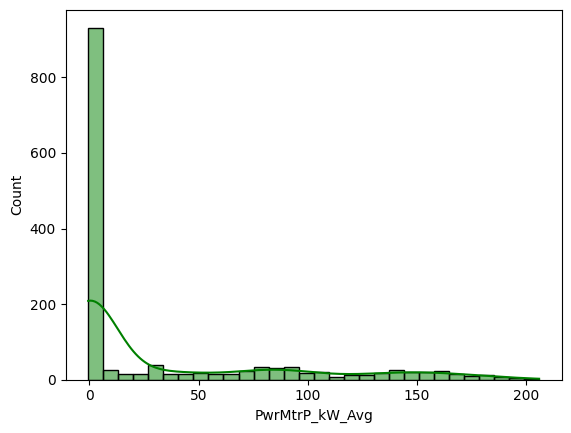

In [64]:
sns.histplot(data=df_selected,x='PwrMtrP_kW_Avg',bins=30,kde=True,color='g')
plt.show()

## Keeping Zero Values in Solar Power Data
- Improving Model Generalization
- Enhancing Time Series Integrity
- Use of Zero-Inflated Models
- Practical Application in Energy Management

#### 4.2 Check distribution of Key Environmental and Power Metrics using violin plot

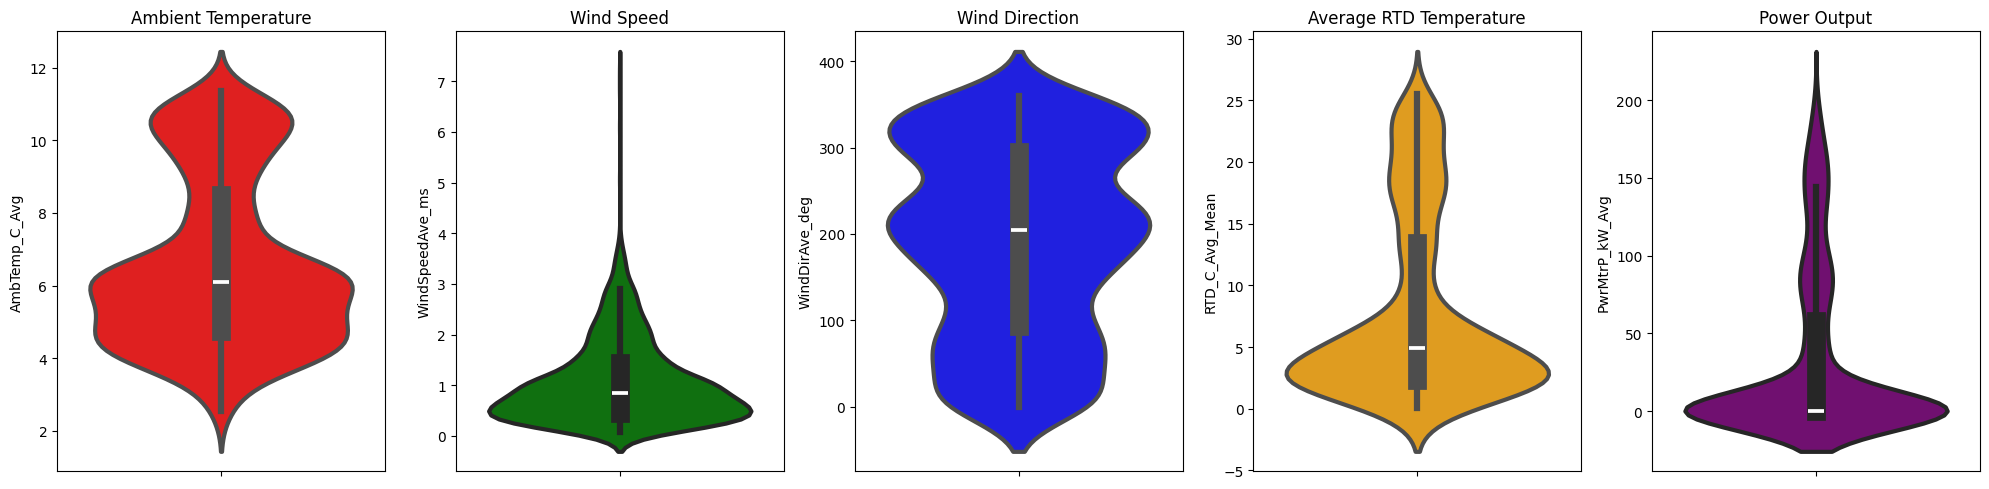

In [66]:
plt.figure(figsize=(20,5))

plt.subplot(1, 5, 1)
plt.title('Ambient Temperature')
sns.violinplot(y='AmbTemp_C_Avg', data=df_selected, color='red', linewidth=3)

plt.subplot(1, 5, 2)
plt.title('Wind Speed')
sns.violinplot(y='WindSpeedAve_ms', data=df_selected, color='green', linewidth=3)

plt.subplot(1, 5, 3)
plt.title('Wind Direction')
sns.violinplot(y='WindDirAve_deg', data=df_selected, color='blue', linewidth=3)

plt.subplot(1, 5, 4)
plt.title('Average RTD Temperature')
sns.violinplot(y='RTD_C_Avg_Mean', data=df_selected, color='orange', linewidth=3)

plt.subplot(1, 5, 5)
plt.title('Power Output')
sns.violinplot(y='PwrMtrP_kW_Avg', data=df_selected, color='purple', linewidth=3)

plt.tight_layout()
plt.show()

#### 4.3 Check outliers using box plot

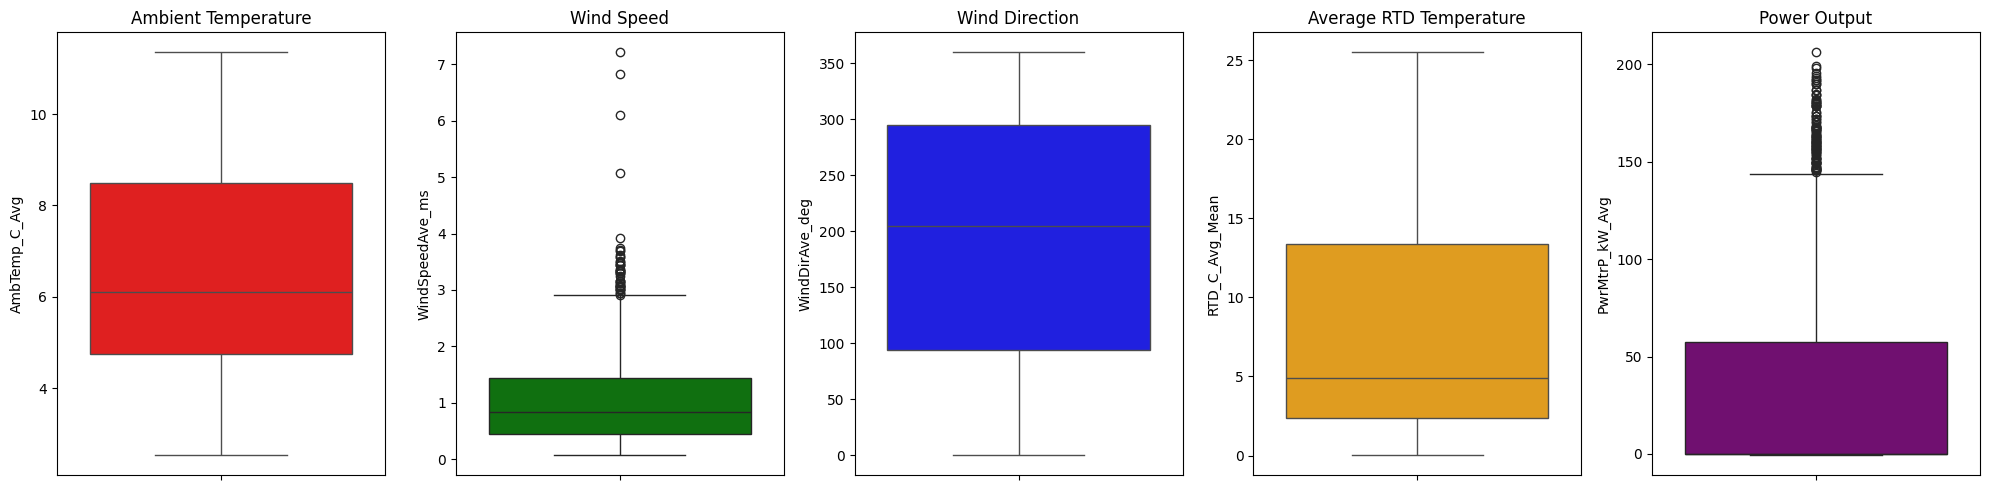

In [67]:
plt.subplots(1, 5, figsize=(20, 5))

plt.subplot(151)
sns.boxplot(df_selected['AmbTemp_C_Avg'], color='red')
plt.title('Ambient Temperature')

plt.subplot(152)
sns.boxplot(df_selected['WindSpeedAve_ms'], color='green')
plt.title('Wind Speed')

plt.subplot(153)
sns.boxplot(df_selected['WindDirAve_deg'], color='blue')
plt.title('Wind Direction')

plt.subplot(154)
sns.boxplot(df_selected['RTD_C_Avg_Mean'], color='orange')
plt.title('Average RTD Temperature')

plt.subplot(155)
sns.boxplot(df_selected['PwrMtrP_kW_Avg'], color='purple')
plt.title('Power Output')

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

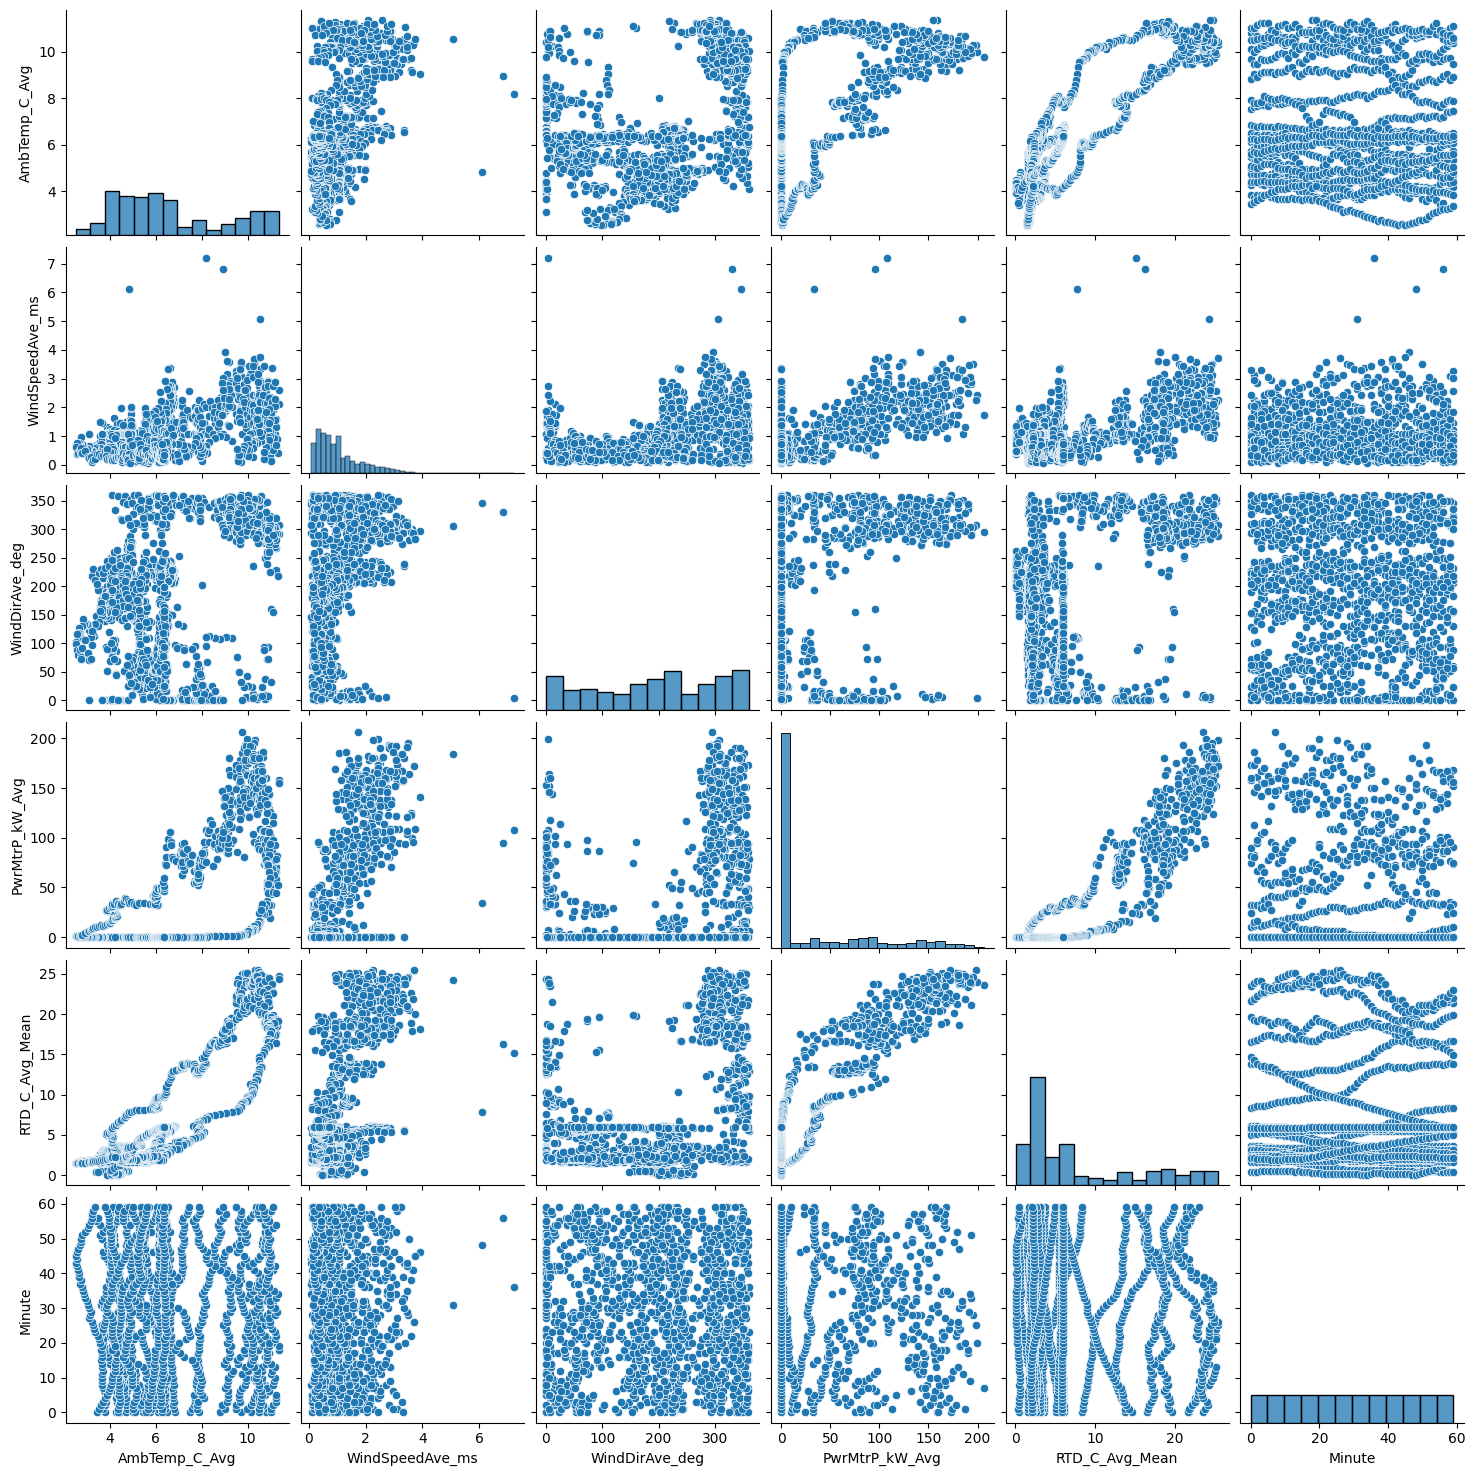

In [68]:
sns.pairplot(df_selected)
plt.show()